Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 171, 16, 3)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 128, 171, 16, 64)  5248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 171, 16, 64)  256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 171, 16, 64)  0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 64, 86, 8, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 86, 8, 128)    221312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 86, 8, 128)    512 

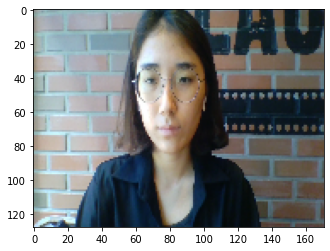

16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


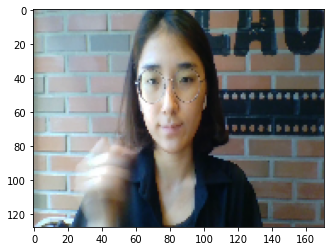

32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


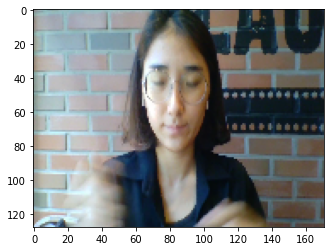

48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


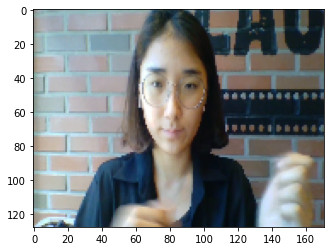

64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


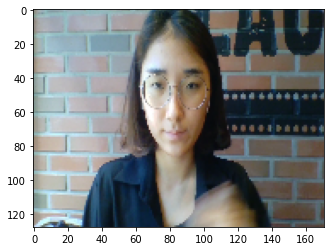

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


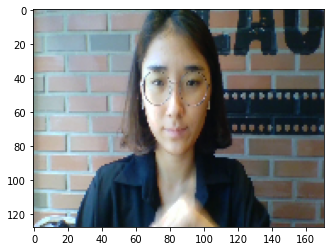

96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


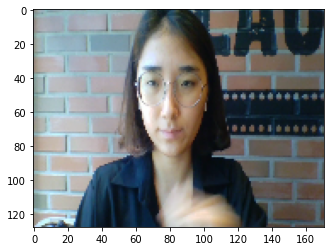

112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


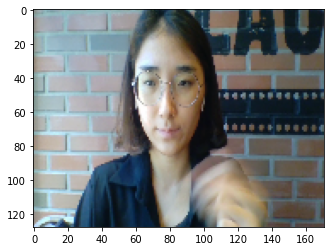

128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


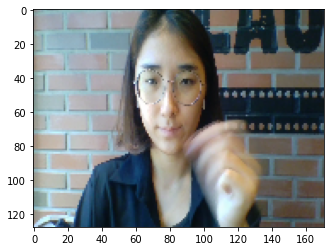

144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


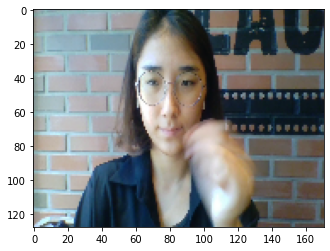

160
161
162
163
164
165
166
167
168
169
170
171
172
173


KeyboardInterrupt: 

In [3]:
import keras
from keras.models import model_from_json
import random
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Conv3D, Input, MaxPool3D, Activation, GlobalAveragePooling3D, ZeroPadding3D
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import cv2
import os
import keras.backend.tensorflow_backend as K
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

globals_imgBuffer = [] 
globals_res = []

# modelCompile : 모델 불러오는 함수 
def modelCompile(): 
    json_file = open('./C3Dmodel/model(lr=0.0001,ADAM,binary,epoch10).json','r')
    model = json_file.read()
    json_file.close()
    model = model_from_json(model)
    model.summary()
    model.load_weights('./C3Dmodel/weights_c3d(lr=0.0001,ADAM,binary,epoch10).h5', by_name=True)
    lr = 0.0001
    optimizer = Adam(lr=lr, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    print("c3d model compile is done!")
    return model

# modelCompile : 모델 불러오는 함수 
def violencePred(model, input):
    pred = model.predict(input)
    if(pred[0][0] < pred[0][1]):
        print("violence detected!!")

        
''' MAIN '''
# 탐지 모델 불러오기
model = modelCompile()

# 확인하고 싶은 비디오 넣기
vidcap = cv2.VideoCapture("./videos/moving_video.mp4")

# 주피터 노트북 상에서 측정 시 이미지 확인 위해서 matplotlib 모듈 임포트
# py 파일 사용해서 터미널에서 실행할 때에는 지우기!
%matplotlib inline
from matplotlib import pyplot as plt


count = 0
while (vidcap.isOpened()):
    ret, image = vidcap.read()
    if(image is not None):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (171, 128))
        print(count)
        globals_imgBuffer.append(image)
        if (count !=0 and (count+1) % 16==0): 
            # 캡처본이 16번 모이면 predict하기
            # 이미 생성되어 있는 모델이 캡처본 16개를 input으로 받아서 일단 이렇게 설정.
            # 우리가 prediction을 보다 지엽적으로 할지 느슨하게 할지 결정되면 숫자 조정 가능할듯.
            globals_res = np.array(globals_imgBuffer)
            globals_res = np.moveaxis(globals_res, 0,2)
            globals_res = globals_res[np.newaxis]
            result = violencePred(model, input = globals_res)

            # predict할 때마다 해당 프레임 이미지 보여주기
            # 주피터노트북에서만 실행 가능
            plt.imshow(image)
            plt.show()

            globals_imgBuffer = []
        count+=1              
            
vidcap.release()